In [571]:
import numpy as np
import pandas as pd
import random as rd
import matplotlib.pyplot as plt
%matplotlib inline

In [572]:
df = pd.read_csv("D:\\Cognitive Application Workshop\\income.csv")
df

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000
5,Gautam,39,155000
6,David,41,160000
7,Andrea,38,162000
8,Brad,36,156000
9,Angelina,35,130000


In [573]:
data = np.array([df['Age'],df['Income($)']]).T
#X_line = X_line.reshape(X_line.shape[0],2)
data

array([[    27,  70000],
       [    29,  90000],
       [    29,  61000],
       [    28,  60000],
       [    42, 150000],
       [    39, 155000],
       [    41, 160000],
       [    38, 162000],
       [    36, 156000],
       [    35, 130000],
       [    37, 137000],
       [    26,  45000],
       [    27,  48000],
       [    28,  51000],
       [    29,  49500],
       [    32,  53000],
       [    40,  65000],
       [    41,  63000],
       [    43,  64000],
       [    39,  80000],
       [    41,  82000],
       [    39,  58000],
       [    40, 157000],
       [    38,  60000],
       [    26,  49000],
       [    42,  65000]], dtype=int64)

In [574]:
ma = np.max(data, axis =0)
mi = np.min(data, axis=0)
data = data/(mi+ma)*100

In [575]:
data

array([[39.13043478, 33.81642512],
       [42.02898551, 43.47826087],
       [42.02898551, 29.46859903],
       [40.57971014, 28.98550725],
       [60.86956522, 72.46376812],
       [56.52173913, 74.87922705],
       [59.42028986, 77.29468599],
       [55.07246377, 78.26086957],
       [52.17391304, 75.36231884],
       [50.72463768, 62.80193237],
       [53.62318841, 66.18357488],
       [37.68115942, 21.73913043],
       [39.13043478, 23.1884058 ],
       [40.57971014, 24.63768116],
       [42.02898551, 23.91304348],
       [46.37681159, 25.60386473],
       [57.97101449, 31.40096618],
       [59.42028986, 30.43478261],
       [62.31884058, 30.9178744 ],
       [56.52173913, 38.647343  ],
       [59.42028986, 39.61352657],
       [56.52173913, 28.01932367],
       [57.97101449, 75.84541063],
       [55.07246377, 28.98550725],
       [37.68115942, 23.67149758],
       [60.86956522, 31.40096618]])

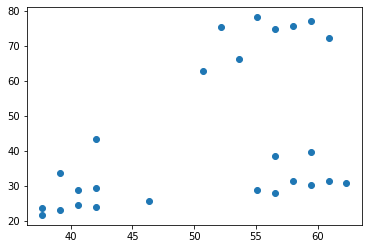

In [576]:
plt.scatter(data[:,0], data[:,1])

In [577]:
def initialise(X, K):
    n = X.shape[1]
    m = X.shape[0]
    centroid = np.array([]).reshape(n,0)
    index = np.random.choice(m, K, replace=False)
    for k in range(K):
        centroid = np.c_[centroid,X[index[k]]]
    return centroid

In [578]:
def closest(X, K):
    output = {}
    m = X.shape[0]
    centroid = initialise(X, K)
    for i in range(m):
        dis = np.random.randn(K,)
        for j in range(K):
            dis[j] = (centroid[0,j] - X[i,0])**2 + (centroid[1,j] - X[i,1])**2
        mi = np.min(dis, axis=0)
        min_index = np.where(dis == mi)
        output[i]=min_index[0]
        centroid[0,min_index[0]] = (centroid[0,min_index[0]] + X[i,0])/2
        centroid[1,min_index[0]] = (centroid[1,min_index[0]] + X[i,1])/2
        
    return output, centroid

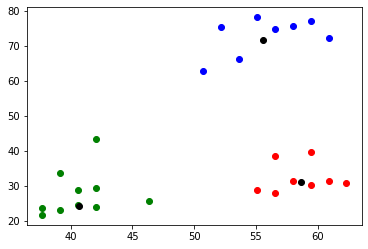

In [579]:
colour = {0 : 'red', 1 : 'blue', 2 : 'green'}
output, centroid = closest(data, 3)
m = data.shape[0]
while True:
    output_prev = {}
    for i in range(m):
        output_prev[i] = output[i][0] 
    output, centroid = closest(data, 3)
    f = 0
    for i in range(m):
        if (output_prev[i] != output[i][0]):
            f=1
            break
    if (f==0):
        break
for i in range(m):
    plt.scatter(data[i,0],data[i,1], color = colour[output[i][0]])
plt.scatter(centroid[0,:],centroid[1,:],color = 'black')
plt.show()


In [580]:
def K_means(X, K):
    m = X.shape[0]
    output, centroid = closest(data, K)
    while True:
        output_prev = {}
        for i in range(m):
            output_prev[i] = output[i][0] 
        output, centroid = closest(data, K)
        f = 0
        for i in range(m):
            if (output_prev[i] != output[i][0]):
                f=1
                break
        if (f==0):
            break
    return output, centroid

In [581]:
def elbow(X, centroid, output):
    sum =0
    for i in range(X.shape[0]):
        sum = sum + (centroid[0,output[i][0]] - X[i,0])**2 + (centroid[1,output[i][0]] - X[i,1])**2
    return sum

1
2
3
4
5
6


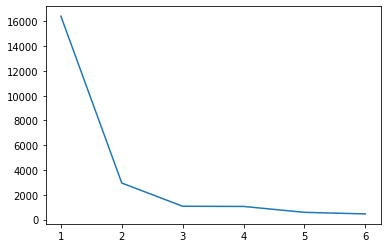

In [584]:
K_diff = []
for i in range(1,7):
    output, centroid = K_means(data, i)
    K_diff.append(elbow(data, centroid, output))
    print(i)
plt.plot(range(1,7),K_diff)